In [5]:
import os
import sys
from pathlib import Path
rootFolder = str(Path(os.path.abspath('')).parent)
sys.path.append(rootFolder)

In [6]:
import numpy as np
from numpy import pi
from math import ceil, sin
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from sim.extracellular_stim_tools.spherical_cartesian_conversion import norm_spherical_to_cartesian
from sim.extracellular_stim_tools.angular_grid import get_angles, unpack_angles
from sim.extracellular_stim_tools.coord_rotations import rotate_coords_from_axis_to_pos_z, get_rotation_from_axis_to_pos_z, rotate_coords

%matplotlib widget

422
648.0


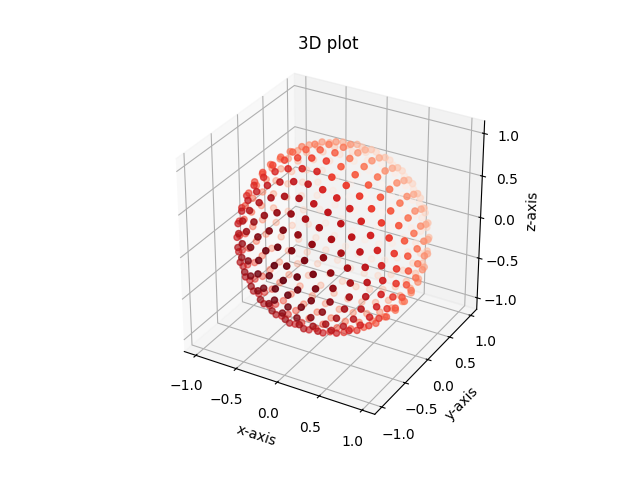

In [7]:
# print(get_num_azimuthal_angles(90, 60))
polar_resolution = 10
azimuthal_resolution = polar_resolution
angles, angle_list = get_angles(polar_resolution, azimuthal_resolution)
num_points = len(angle_list)
print(num_points)
print((180/polar_resolution)*(360/azimuthal_resolution))
xs = []
ys = []
zs = []

r = get_rotation_from_axis_to_pos_z([5, -1, 0])

for angle in angle_list:
    x, y, z = rotate_coords(r, norm_spherical_to_cartesian(angle[0], angle[1]))
    xs.append(x)
    ys.append(y)
    zs.append(z)

ax = plt.figure().add_subplot(projection='3d')

ax.scatter(xs, ys, zs, c=range(num_points), cmap='Reds') 
ax.set_aspect('equal')
ax.set_title("3D plot") 
ax.set_xlabel('x-axis') 
ax.set_ylabel('y-axis') 
ax.set_zlabel('z-axis') 
plt.show()